In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
data = load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

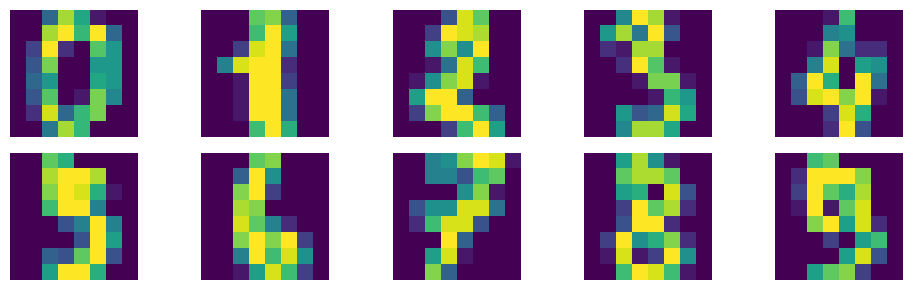

In [22]:
_,axes = plt.subplots(nrows=2,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes.ravel(),data.images,data.target):
    ax.axis('off')
    ax.imshow(image)
plt.tight_layout()
plt.show()

In [24]:
data.images.shape

(1797, 8, 8)

In [25]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [26]:
data.images[0].shape

(8, 8)

In [27]:
length = len(data.images)

In [28]:
df = data.images.reshape((length,-1))

In [33]:
df[0].shape

(64,)

In [34]:
df.shape

(1797, 64)

In [38]:
df.shape

(1797, 64)

In [39]:
df.min()

0.0

In [40]:
df.max()

16.0

In [42]:
df = df/df.max()

In [43]:
df.min()

0.0

In [44]:
df.max()

1.0

In [45]:
df[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(df,data.target,test_size=.4,random_state=2549)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier()

In [52]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
confusion_matrix(Y_test,y_pred)

array([[70,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 65,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 67,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 72,  1,  0,  1,  0],
       [ 1,  2,  0,  0,  0,  1, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 65,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 60]], dtype=int64)

In [57]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       0.95      1.00      0.97        70
           2       1.00      0.98      0.99        66
           3       0.99      0.96      0.98        82
           4       1.00      1.00      1.00        67
           5       0.97      0.97      0.97        74
           6       0.99      0.95      0.97        83
           7       0.97      1.00      0.99        77
           8       0.98      0.96      0.97        68
           9       0.97      0.97      0.97        62

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

